# 

# Lab 2 Project (Titanic)

- **Author:** Aaron Gilllespie 
- **Date:** 2025-03-12
- **Objective:** Utilizing data from the Titanic manifest to train & test a machine learning model.

This code base is being created in the course of completing module 2 of CSIS 44-670 from NW Missouri University. This `README.md` accompanies a Jupyter Notebook in which we will analyze data representing the passengers from the RMS Titanic, which sank in a very famous James Cameron movie (also real life). We are utilizing this dataset to, which [some research suggests](https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/) is a commonly utilized dataset for getting started with Machine Learning. In essence, this is the `hello world!` of my advnetures with machine learning. 


## Section 1. Import and Inspect the Data

In this section we load a sample dataset from Seaborn's library into a DataFrame and do a standard set of what I'll call "getting to know you" methods to get a view of the dataset schema, its contents, the proportions of missing values, and any correlations that exist between the numerical columns.

Importing some standard libraries for working with data in Python.

In [298]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

Loading the Titanic sample dataset from Seaborn. One of what appears to be [about 20 possible options](https://github.com/mwaskom/seaborn-data).

In [299]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

Doing some basic exploratory data analysis to get familiarized with the dataset.

In [300]:
# Display the information about the dataset utilizing the info() method, which provides a concise summary of the DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [301]:
# Print the first 10 rows of the dataset to get a quick overview of the data
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [302]:
# Check for missing values in the dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [303]:
# Display summary statistics of the dataset using describe() method, which provides a statistical summary of the numerical columns
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [304]:
# Display the correlation matrix of the numerical columns in the dataset using the corr() method, which shows the pairwise correlation of all numerical columns
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


## Reflection 1:
1) How many data instances are there?  
**891**

2) How many features are there?  
**15**

3) What are the names?  
**As follows:**
- pclass
- sex
- age
- sibsp
- parch
- fare
- embarked
- class
- who
- adult_male
- deck
- embark_town
- alive
- alone
4) Are there any missing values?  
**Yes**

5) Are there any non-numeric features?  
**Yes, roughly half of the columns are non-numeric**

6) Are the data instances sorted on any of the attributes?  
**Looking at the 10 first rows, I see no obvious sorting.**

7) What are the units of age?  
**Years**
 
8) What are the minimum, median and max age?  
**Minimum: 0.42 years (sad)**
**Median: 28 years**
**Max: 80 years**

9)  What two different features have the highest correlation?  
**There are a few highly correlated datapoints, both positive and negative. Here are the most correlated pairs:**
- alone & sibsp, also alone & parch: both at roughly -0.584
- adult_male & survived: -0.557 --- it wasn't good to be an adult male

10)   Are there any categorical features that might be useful for prediction?  
**You could make a category for children utilizing the `age` column, and another for `women` using th a combination of `adult_male` and `age`.**


## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

In this subsection we will do a few things:

1. Create a scatter plot utilizing age, fare, and passenger class.
2. Create a scatter plot using age, fare & gender, colored by gender
3. Create a histogram showing the distribution of ages on board
4. Create a bar chart showing the stark contrast in survival rates between the classes

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

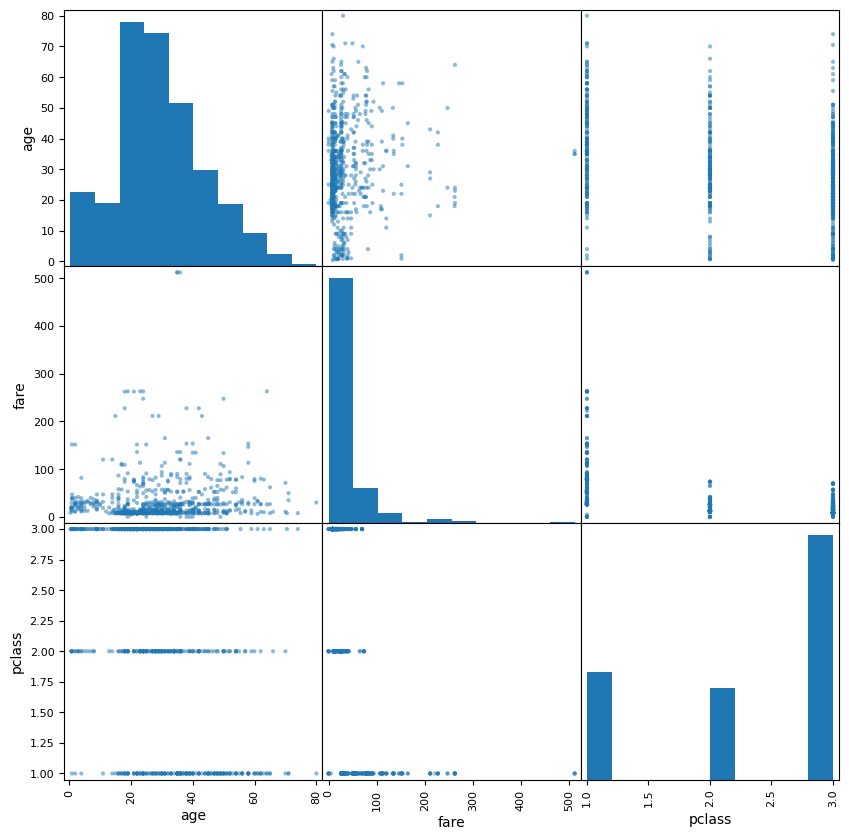

In [305]:
# Create a scatter matrix of the 'age', 'fare', and 'pclass' columns in the Titanic dataset using the scatter_matrix function from pandas.plotting
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

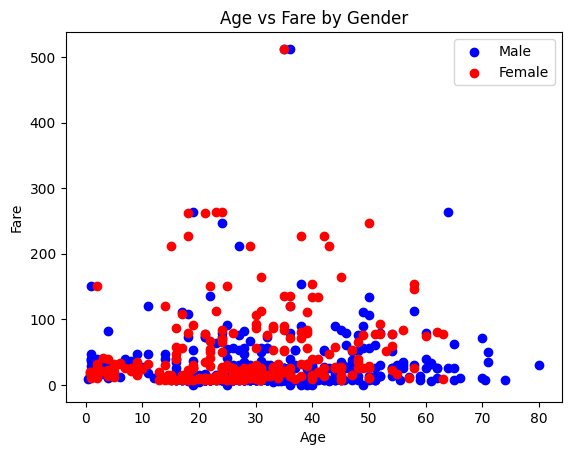

In [306]:
# Separate male and female data
male_data = titanic[titanic['sex'] == 'male']
female_data = titanic[titanic['sex'] == 'female']

# Plot male and female data separately
plt.scatter(male_data['age'], male_data['fare'], label='Male', c='blue')
plt.scatter(female_data['age'], female_data['fare'], label='Female', c='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

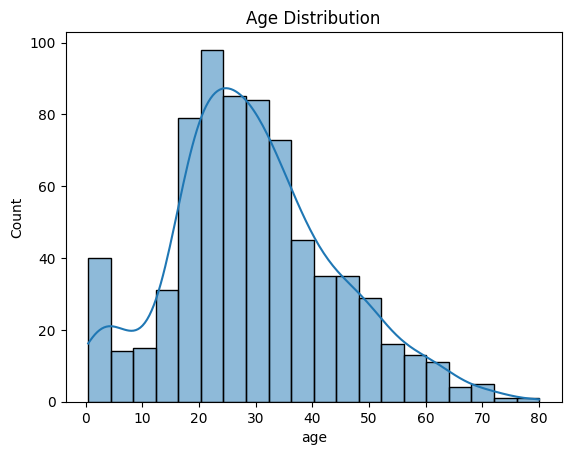

In [307]:
# Creating a histogram of the 'age' column in the Titanic dataset using seaborn's histplot function
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

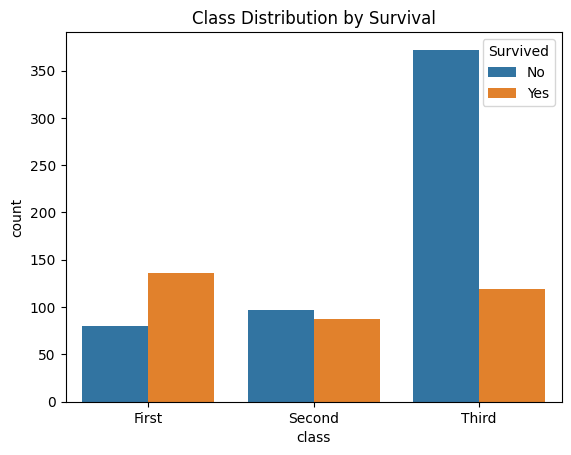

In [308]:
# Creating a count plot of the 'class' column in the Titanic dataset using seaborn's countplot function, colored according to the 'survived' column
ax = sns.countplot(x='class', hue='survived', data=titanic)

# Modify the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Survived') # or ['No', 'Yes']

# Add title and show the plot
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1
1. What patterns or anomalies do you notice?
- Honestly the first thing I noticed were that 2 people paid a **lot** to be on the ship.
- There were a lot of newborns compared to children-but-not-new-borns. I'm wondering if the ship had a "everyone under ____ is free" policy which led to more very young people.
- The people in Second Class and Third Class didn't pay all that much different in their fares, but their **fates** varied dramatically.


2. Do any features stand out as potential predictors?
- Being a man was not good for your chances of survival.
- Being in 3rd class was similarly not good.

1. Are there any visible class imbalances?
- Yes, clearly. There are a lot more Third Class folks overall than the other two classes, and a much higher proportion of the 3rd class passengers died.


### 2.2 Handle Missing Values and Clean Data

In the sample dataset the `age` and `embark_town` columns contain some missing values. This section deals with replacing those blank values with sensible values derived from the rest of the dataset.

In [309]:
# Fill missing values in 'age'
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing values in 'embark_town'
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Verify the changes
print(titanic.isnull().sum()) # should now show 0 for age and embark_town

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


### 2.3 Feature Engineering

Here we are adding a few features that refer to the size of the families that were on board. We're also creating numeric representations of some categorical columns.

In [310]:
# Create a new column 'family_size' by adding 'sibsp' and 'parch' columns and adding 1 (for the individual themselves)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical variables to numerical values using map
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a new column 'alone' where 1 means the passenger is alone (family_size == 1) and 0 means they are not
titanic['alone'] = titanic['alone'].astype(int)

### Reflection 2.3
1. Why might family size be a useful feature for predicting survival?   
**Humans are communal animals. We work better in a community. We use our family for protection and we will protect them. If you're alone on that ship and you're trying to take a seat from one of my kids, you're not getting it. Even if it means we both go down before the water takes us.**
2. Why convert categorical data to numeric?  
**The machine learning algorithms expect numeric inputs. This may also be out of convention or for consistency.**

## Section 3. Feature Selection and Justification

In this section we are seleting two features from the dataset we will use to create a machine learning model from. These two features will be utilized to target the value of the `survived` column.

I believe in the James Cameron movie `Titanic` they were saying 'Women and Children first' - so I'm making my selection to see if that bares out in the dataset

- `sex` - to catch the "women" criteria
- `age` - to catch the "and children" criteria


In [311]:
X = titanic[['age', 'sex']]
y = titanic['survived']

## Section 4. Splitting

In this section we do the standard approach for machine learning against a single dataset - splitting it into learning & test sets. We're doing this using random sampling & *stratified* sampling.

- train_test_split: Randomly splits data into training and testing sets, without considering class balance.
- StratifiedShuffleSplit: Creates stratified splits, ensuring that the class distribution in the training and testing sets closely mirrors the original dataset, and shuffles the data.

### Basic Train/Test split 

In [312]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


In [313]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", X_train['sex'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", X_test['sex'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 sex
0    0.647472
1    0.352528
Name: proportion, dtype: float64
Test Set Class Distribution:
 sex
0    0.648045
1    0.351955
Name: proportion, dtype: float64


###  Stratified Train/Test split

In [314]:
# Stratified sampling - to ensure the proportion of classes is maintained in both training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [315]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['sex'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['sex'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 sex
0    0.646067
1    0.353933
Name: proportion, dtype: float64
Test Set Class Distribution:
 sex
0    0.653631
1    0.346369
Name: proportion, dtype: float64


### Reflection 4:

1. Why might stratification improve model performance?  
**Stratification maintains a fundamental ratio, which may be *very impactful* on the correlations. If you were to get unlucky and have a training set that's wildly underpreresenting a subset of the population that holds a particular, highly impactful trait, your test and training sets will not be able to properly benefit from the correlations this trait would have given.**

2. How close are the training and test distributions to the original dataset?  
**In this case, they are within a couple percent for both**.  

3. Which split method produced better class balance?  
**In my case they were actually both pretty similar, however I understand the concept and believe my choice in features randomly worked out such that the first dataset was fairly close to being representative. I believe we should expect, on average, the stratified dataset to be more representive, because it is being controlled for representativeness.**